---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_text.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## 📈 Text.

In [1]:
# | default_exp text

In [2]:
# | export
"""text of plotting functions."""

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_rgba
from matplotlib.text import Text
def set_text_multicolored(
    x: float = None,
    y: float = None,
    s: str = None,
    sep: str = None,

    color: any = None,
    color2_alpha=0.5,
    
    ha='center',
    ax=None,
    **kwargs
):
    """
    Plots a string split into two parts with different color.

    The string is split by the separator `sep`. If `color` is a single
    color string, the second part of the text is drawn with 50% alpha.

    Args:
        x (float): The horizontal coordinate for the text.
        y (float): The vertical coordinate for the text anchor point.
        s (str): The string to plot, containing the separator.
        sep (str): The separator to split the string by (e.g., '\\n').
        color (any, optional): A list/tuple of two color, or a single
                                color string. Defaults to ['black', 'gray'].
        ax (plt.Axes, optional): The axes to plot on. If None, uses plt.gca().
        **kwargs: Additional keyword arguments passed to both ax.text calls
                  (e.g., ha, fontsize).
    """
    if isinstance(s,Text):
        text_obj=s
        del s
        # 1. Extract properties from the existing text object
        ax = text_obj.axes
        s = text_obj.get_text()
        x, y = text_obj.get_position()
        
        # Extract original text properties to pass them along
        text_props = {
            'color' : text_obj.get_color(),
            'ha': text_obj.get_ha(),
            'fontsize': text_obj.get_fontsize(),
            'fontweight': text_obj.get_fontweight(),
        }
        # Update with any new kwargs the user provides
        text_props.update(kwargs)
    
        # 2. Remove the original text object from the axes
        text_obj.remove()
    
        # 3. Call the drawing function to replace it
        return set_text_multicolored(
            x=x, y=y, s=s,
            ax=ax,
            **text_props
        )
        
    if ax is None:
        ax = plt.gca()

    # --- Modification: Handle the color argument dynamically ---
    if color is None:
        color = 'black'
    if isinstance(color, str):
        # If a single color string is given, use it for the first part
        # and a semi-transparent version for the second.
        color1 = color
        rgba = to_rgba(color)
        color2 = (rgba[0], rgba[1], rgba[2], color2_alpha) # Set alpha to 0.5
    else:
        # Assume color is a list or tuple of two color
        color1, color2 = color[0], color[1]
    # --- End Modification ---

    # Split the input text into two parts
    if sep is None:
        if '\n' in s:
            sep='\n'
            
    parts = s.split(sep, 1)
    string_part1 = parts[0]
    string_part2 = parts[1] if len(parts) > 1 else ""

    # Set default horizontal alignment if not provided
    # kwargs.setdefault('ha', 'center')

    # 1. Plot the first part, aligned by its bottom edge
    ax.text(
        x,
        y,
        string_part1,
        **{
            **dict(
                va='bottom' if sep =='\n' else 'center',
                ha=ha if sep =='\n' else 'right',
                color=color1,
            ),
            **kwargs,
        }
       )

    # 2. Plot the second part, aligned by its top edge
    ax.text(
        x,
        y,
        string_part2,
        **{
            **dict(
                va='top' if sep =='\n' else 'center',
                ha=ha if sep =='\n' else 'left',
                color=color2,
            ),
            **kwargs,
        }
        )

    return ax

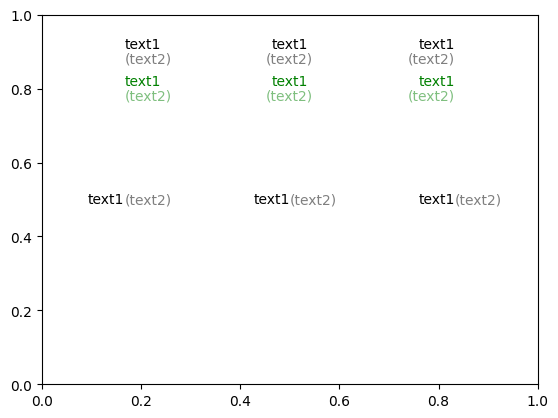

In [3]:
fig, ax = plt.subplots()

for x,ha in enumerate(['left','center','right',]):
    _=set_text_multicolored(
        x=(x+0.5)/3,
        y=0.9,
        s="text1\n(text2)",
        color='k',
        ha=ha,
        ax=ax,
    )

    set_text_multicolored(
        s=ax.text(
            x=(x+0.5)/3,
            y=0.8,
            s="text1\n(text2)",
            ha=ha,
            color = 'g',
        ),
    )
    ## TODO
    _=set_text_multicolored(
        x=(x+0.5)/3,
        y=0.5,
        s="text1 (text2)",
        color='k',
        ax=ax,
        ha=ha,
    )

In [4]:
# # --- Test Snippet ---
# def _plot(ax):
    
#     # 1. Create a sample plot
#     y_positions = [0, 1, 2]
#     y_labels = [
#         "Group A\n(n=10)",
#         "Group B\n(n=25)",
#         "Group C\n(n=15)"
#     ]
#     ax.barh(y_positions, [10, 15, 12])
#     ax.set_yticks(y_positions, labels=y_labels)
#     return ax
# fig, axs = plt.subplots(1,2,figsize=(6, 5))
# _plot(axs[0])

# ax=_plot(axs[1])
# # 2. Apply the function to the y-axis tick labels
# set_ticklabels_multicolored(
#     ax=ax,
#     axis='y',
#     sep='\n',
# )
# ax.tick_params(axis='y', length=0) # Hide the tick marks for a cleaner look

## Outputs

In [5]:
import nbdev
nbdev.export.nb_export(
    'roux_viz_text.ipynb',
    lib_path='../roux/viz/'
)

### Documentation
[`roux.viz.text`](https://github.com/rraadd88/roux#module-rouxvizline)